In [480]:
#import the libraries
#plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#models libraries


import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import scipy.cluster.hierarchy as hcd
from sklearn.cluster import AgglomerativeClustering
#from sklearn.cluster import DBSCAN


#import hdbscan





In [374]:
#define data scaling class for using the standard scaler
class data_scaler:
    
    def __init__(self, file):
#creates train and test dataframe
        self.df = self._load_data(file)
        
    def _load_data(self, file):
        return pd.read_csv(file)
    
    def dataset_info(self, file):
#prints main information
        df = self._load_data(file)
        print('\n{0:*^80}'.format(' Reading from the file {0} '.format(file)))
        print("\nit has {0} rows and {1} columns".format(*df.shape))
        print('\n{0:*^80}\n'.format(' It has the following columns '))
        print(df.columns)
        print('\n{0:*^80}\n'.format(' Description of quantitative columns'))
        print(df.describe(include=[np.number]))
        print('\n{0:*^80}\n'.format(' Description of categorical columns'))
        print(df.describe(include=['O']))
        
        
    def standard_scaler(self, df):
        scaled = StandardScaler().fit_transform(df)
        df_scaled = pd.DataFrame(scaled, columns=df.columns)
        return df_scaled

In [440]:
#Define clustering class

#k-means clustering
class clustering_methods:
    def k_means(self, df, n_clusters):
        kmeans = KMeans(n_clusters=n_clusters)
        df['cluster'] = kmeans.fit_predict(df[df.columns])
        return df
    
#Hierarchical Agglomerative Clustering       
    def aggolmerative_clustering(self, df, n_clusters, affinity, linkage):
        agglom = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
        df['cluster'] = agglom.fit_predict(df)
        return df
    
#Dencity Based Clustering
    def density_based_clustering(self, df, eps, metric, min_samples):
        '''predict clusters using dbscan'''
        dbscan_df = DBSCAN(eps=eps, metric=metric, min_samples=min_samples).fit(df)
        labels = dbscan_df.labels_
        df["cluster"] = dbscan_df.fit_predict(df)                                                              
        return df
    def hierarchical_density_based_clustering(self, df, min_cluster_size, gen_min_span_tree=True):
#predict clusters using hdbscan'''
        clusterer_hdbscan = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, gen_min_span_tree=gen_min_span_tree)
        clusterer_hdbscan.fit(df)
        df["cluster"] = clusterer_hdbscan.fit_predict(df) 
        return df


In [441]:
#Define dimensonality reduction class, for visualizing the data

class dimensionality_reduction:
    def pca_transform(self, df_scaled, n_components):
#dimentionality reduction using pca'''
        pca = PCA(n_components=n_components)
        pcomponents = pca.fit_transform(df_scaled)
        pca_df = pd.DataFrame(pcomponents, columns = ['PC1', 'PC2'])
        ratio = pca.explained_variance_ratio_
        return pca_df, ratio
        
        
    def tsne_transform(self, df_scaled, n_components):
        tsne_transform = TSNE(n_components= n_components).fit_transform(df_scaled)
        return tsne_transform
    
    

In [442]:
#Define visualization class

class visualization:
#define the function that creates the basic model 
    def __init__(self):
        sns.set(rc={'figure.figsize': (11.7, 6.27)})
        self.palette = "viridis"
        self.color = "darkblue"
    
    
    
     
    def plot_elbow_curve(self, df, num):
#plot elbow curve to choose number of clusters
        k = range(1, num)
        kmeans = [KMeans(n_clusters=i) for i in k]
        score = [kmeans[i].fit(df[df.columns]).score(df[df.columns]) for i in range(len(kmeans))]
        pl.plot(k, score)
        pl.xlabel('Number of Clusters')
        pl.ylabel('Score')
        pl.title('Elbow Curve')
        pl.show()
        
    def plot_pca(self, pca_df, df, cluster_column):
#scatterplot to visualize after pca transformation
        sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df[cluster_column], palette=self.palette)
        plt.xlabel('First principle component')
        plt.ylabel('Second principle component')
        plt.show()


    def plot_tsne(self, tsne_df, df, cluster_column):
#scatterplot to visualize after tsne transformation
        sns.scatterplot(x=tsne_df[:, 0], y=tsne_df[:, 1], hue=df[cluster_column], palette=self.palette)
        plt.xlabel('First tsne component')
        plt.ylabel('Second tsne component')
        plt.show()
        
    def plot_dendrogram(self, df, metric, method):
#plot dendrogram to choose number of clusters
        plt.style.use('ggplot')
        hcd.set_link_color_palette(["#B061FF", "#7a0177"])
        dendrogram = hcd.dendrogram(hcd.linkage(df, metric=metric, method=method))
        plt.title('Dendrogram', size=20)
        plt.xlabel('SOngs', size=15)
        plt.ylabel('Euclidean Distances', size=15)
        plt.show()
        
    def plot_clusters(self, df, cluster):
#plot clusters interpretation
        sns.set_style("whitegrid")
        bins = np.linspace(0,1,10)
        fig, ax = plt.subplots(1, 6, figsize=(15, 3))
        cluster_df = df[df.cluster == cluster]
        cluster_features = ['acousticness', 'danceability', 'loudness', 'energy', 'tempo','valence']
        col = 0
        for feature in cluster_features:
            general = df.groupby(pd.cut(df[feature], bins)).size().reset_index(name='count')
            cluster = cluster_df.groupby(pd.cut(cluster_df[feature], bins)).size().reset_index(name='count')
            sns.barplot(data=general, x=feature, y='count', color='#efedf5', ax=ax[col])
            sns.barplot(data=cluster, x=feature, y='count', color='#224d55', ax=ax[col])
            ax[col].set_xticklabels(range(1,10), fontsize=12)
            col += 1
        plt.show()    


In [443]:
#define the file path 
file_path = "/home/asmaosman/Music/Thesis files/Data_Exploratory_csv/features/features_final.csv"

In [444]:
#Scale the data through using the scaler class
data = data_scaler(file_path)
music_data = data.df
df.tail()

,Unnamed: 0,track_id,track_title,artist_name,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
669,669,3se7Q6bvPWnaBI2Vh3sMvc,Zeenat alshabab,Gamal Farfour,4,2015,0.481,0.730,8,-8.289,1,0.73,0.0000,0.1560,0.941,71.326,362710,4
670,670,5uLwd5QTkKH0hV47AvwQhx,Ziyaret habeebi,Sharhabil Ahmed,4,2017,0.588,0.713,0,-7.456,1,0.09,0.0073,0.0928,0.857,153.968,392889,4
671,671,5nvCrw9rahUVZodSBY6Ngn,Zohor alrawd,Salah Mustafa,4,2020,0.575,0.269,2,-22.835,0,0.53,0.0000,0.5740,0.761,110.744,264882,4
672,672,6NA8OiZFCLURDxqZEz7sv9,Zombie,Squad التالتة,16,2020,0.673,0.676,7,-8.827,0,0.23,0.0000,0.1610,0.539,152.338,96494,4
673,673,49TspotyYMnBnqoYIrTYz5,Zoroni marra,Sayed Khalifa,1,2015,0.653,0.864,11,-3.362,0,0.34,0.0000,0.0814,0.845,158.393,115391,4


In [445]:
music_data = df.drop(['Unnamed: 0','track_title','track_id','artist_name','instrumentalness','release_date','time_signature','duration_ms', 'mode', 'key', 'liveness'], axis=1)

In [446]:
music_data.head()

,popularity,danceability,energy,loudness,acousticness,valence,tempo
0,1,0.317,0.386,-13.066,0.97,0.782,100.796
1,9,0.527,0.444,-13.708,0.66,0.725,124.681
2,6,0.494,0.170,-20.979,0.70,0.314,155.024
3,0,0.322,0.630,-9.473,0.92,0.758,102.394
4,12,0.737,0.704,-7.925,0.31,0.737,139.985


In [447]:
music_data.to_csv('/home/asmaosman/Music/Thesis files/Data_Exploratory_csv/features/music_data_scaled.csv')

In [448]:
music_data.shape

(674, 7)

In [449]:
clustering = clustering_methods()
dimention = dimensionality_reduction()
plot = visualization()


In [450]:
scaled_data = data.standard_scaler(music_data)

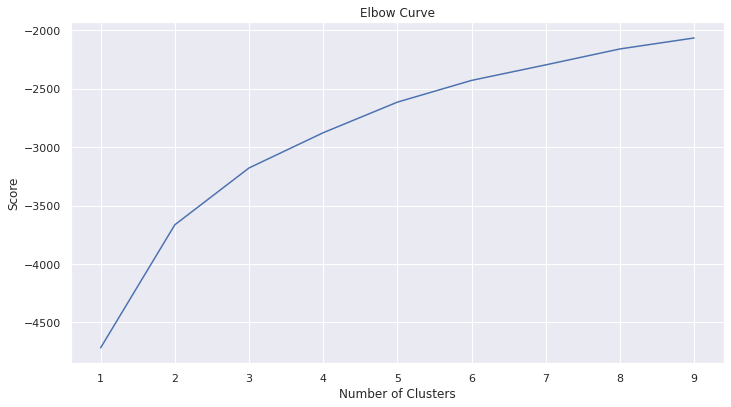

In [451]:
plot.plot_elbow_curve(scaled_data, 10)

In [452]:
#Create 3 clusters as the Elbow plot suggested
kmeans_df = clustering.k_means(scaled_data, 3)

In [453]:
kmeans_df.groupby([kmeans_df.cluster == 7]).size()

cluster
False    674
dtype: int64

In [454]:
kmeans_df_transform, ratio = dimention.pca_transform(kmeans_df, 2)

In [455]:
# explained_variance_ratio
ratio

array([0.29904857, 0.2253493 ])

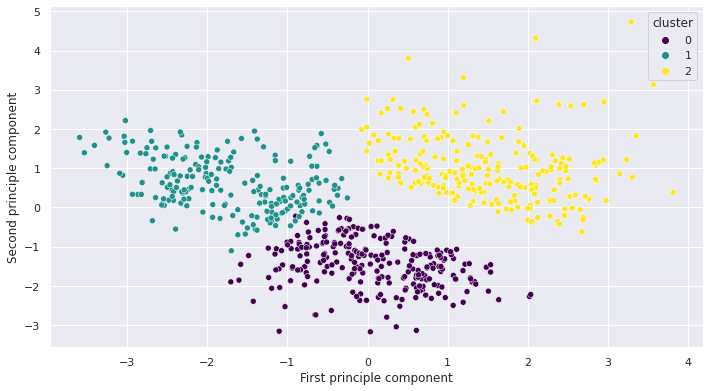

In [456]:
##Visualization based on t-sne
plot.plot_pca(kmeans_df_transform, kmeans_df, 'cluster')

In [457]:
#Visualization based on t-sne
kmeans_tsne = dimention.tsne_transform(kmeans_df, 2)

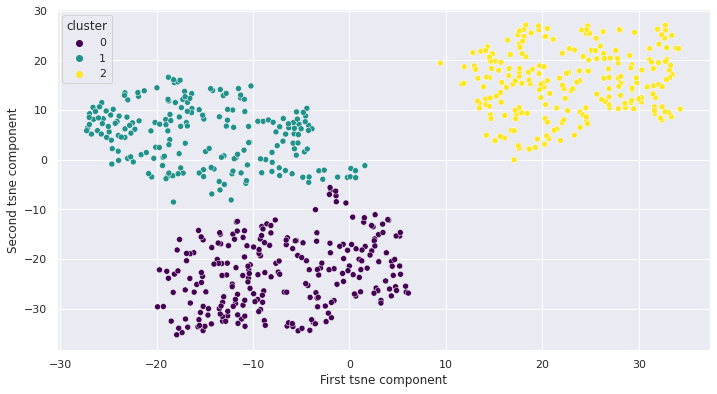

In [458]:
plot.plot_tsne(kmeans_tsne, kmeans_df, 'cluster')

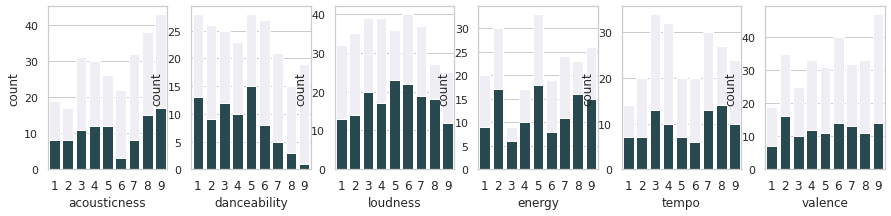

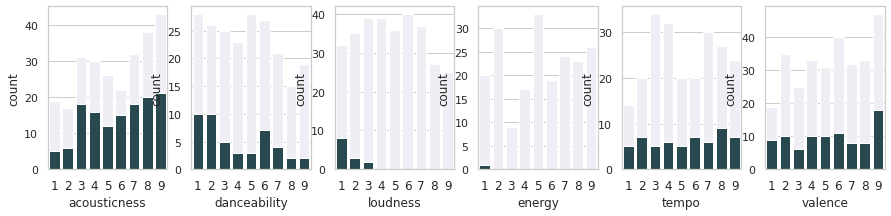

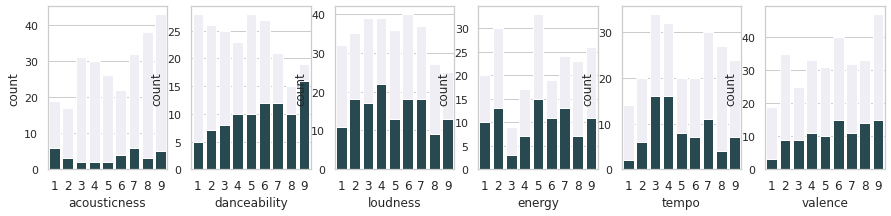

In [459]:
for i in np.sort(kmeans_df['cluster'].unique()):
    plot.plot_clusters(kmeans_df, i)


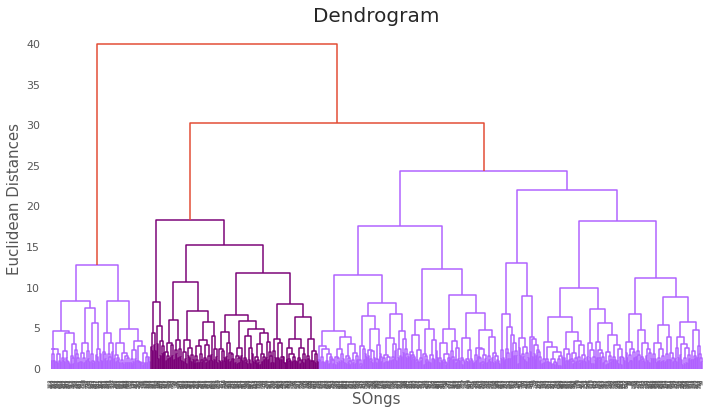

In [479]:
plot.plot_dendrogram(scaled_data, 'euclidean', 'ward')

In [461]:
hc_df = clustering. aggolmerative_clustering(scaled_df, 4, 'euclidean', 'ward')

In [462]:
hc_df.cluster.unique()

array([0, 3, 2, 1])

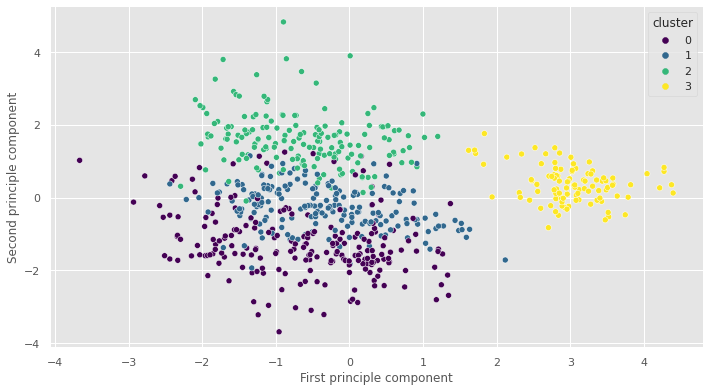

In [463]:
hc_df_transform, ratio = dimention.pca_transform(hc_df, 2)
plot.plot_pca(hc_df_transform, hc_df, 'cluster')


In [464]:
ratio

array([0.29963328, 0.2124212 ])

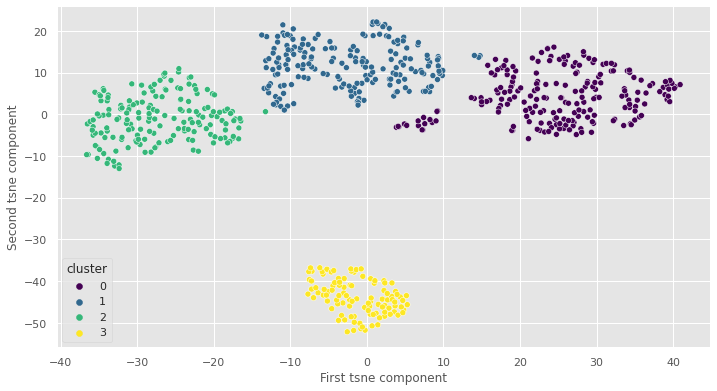

In [465]:
hc_tsne = dimention.tsne_transform(hc_df, 2)
plot.plot_tsne(hc_tsne, hc_df, 'cluster')


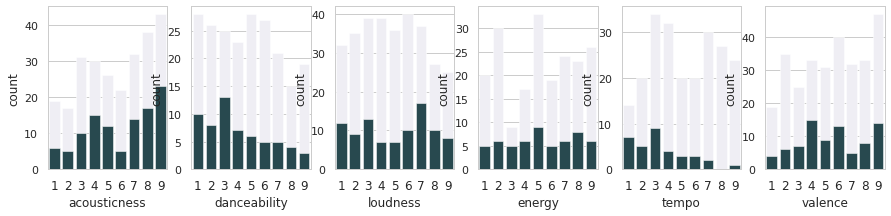

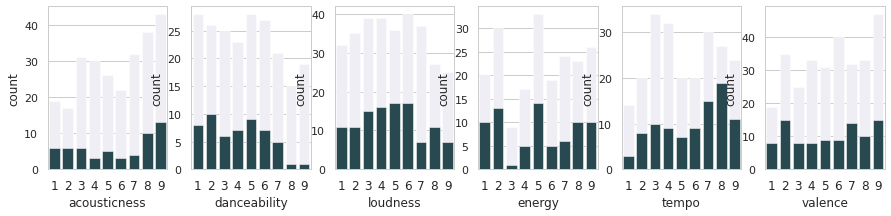

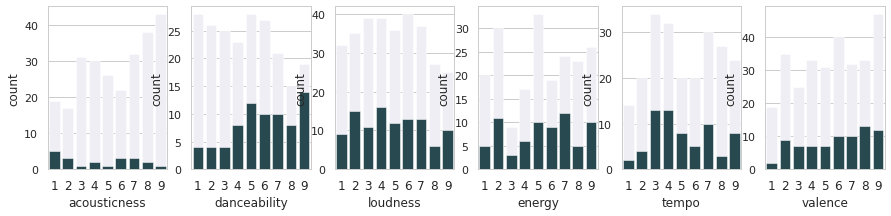

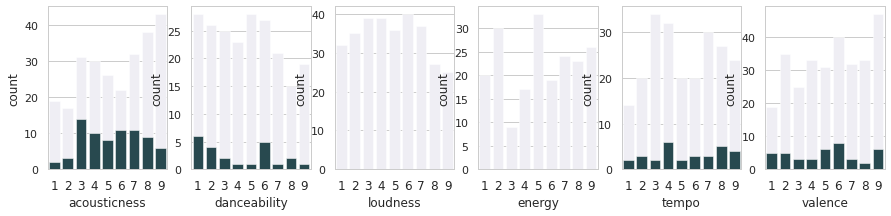

In [466]:
for i in np.sort(hc_df['cluster'].unique()):
    plot.plot_clusters(hc_df, i)


In [467]:
#DBSCAN 
#density_df = clustering.density_based_clustering(scaled_data, 0.5, 'euclidean', 10)

In [476]:
#what is happening here according to my data? no clusters at all?
#density_df.cluster.unique()

In [469]:
#density_tsne = dimention.tsne_transform(density_df, 2)
#plot.plot_tsne(density_tsne, density_df, 'cluster')
#hdbscan_df = clustering.hierarchical_density_based_clustering(scaled_data, 20, gen_min_span_tree=False)
#hdbscan_df.cluster.unique()